In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기 객체 생성
model = decisiontree.fit(features, target) # 모델 훈련

observation = [[ 5, 4, 3, 2]] # New 샘플 데이터
model.predict(observation) # 샘플 데이터의 클래스 예측
model.predict_proba(observation) # 세 개의 클래스에 대한 예측 확률을 확인

# 엔트로피를 사용해 결정 트리 분류기를 훈련합니다.
decisiontree_entropy = DecisionTreeClassifier( criterion='entropy', random_state=0)
model_entropy = decisiontree_entropy.fit(features, target) # 모델 훈련

In [19]:
model_entropy.predict_proba(observation)

array([[0., 1., 0.]])

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

boston = datasets.load_boston() # 데이터 로드
features = boston.data[:,0:2] #두 개의 특성만 선택
target = boston.target

decisiontree = DecisionTreeRegressor(random_state=0) # 결정 트리 회귀 모델 객체 생성
model = decisiontree.fit(features, target) # 모델 훈련
observation = [[0.02, 16]] #New 샘플 데이터
model.predict(observation) # 샘플 데이터의 타깃을 예측
# 평균 제곱 오차를 사용한 (평균 절댓값 오차MAE가 감소되는) 결정 트리 회귀 모델 객체 생성
decisiontree_mae = DecisionTreeRegressor(criterion="mae", random_state=0)
model_mae = decisiontree_mae.fit(features, target) # 모델 훈련

In [28]:
model_mae.predict(observation)

array([33.])

In [29]:
model.predict(observation)

array([33.])

In [39]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

decisiontree = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기를 만듭니다.
model = decisiontree.fit(features, target) # 모델 훈련
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names) # DOT 데이터를 만듭니다
graph = pydotplus.graph_from_dot_data(dot_data) # 그래프를 그립니다.
Image(graph.create_png()) # 그래프 출력
# graph.write_pdf("iris.pdf") # PDF를 만듭니다.
# graph.write_png("iris.png") # PNG 파일을 만듭니다

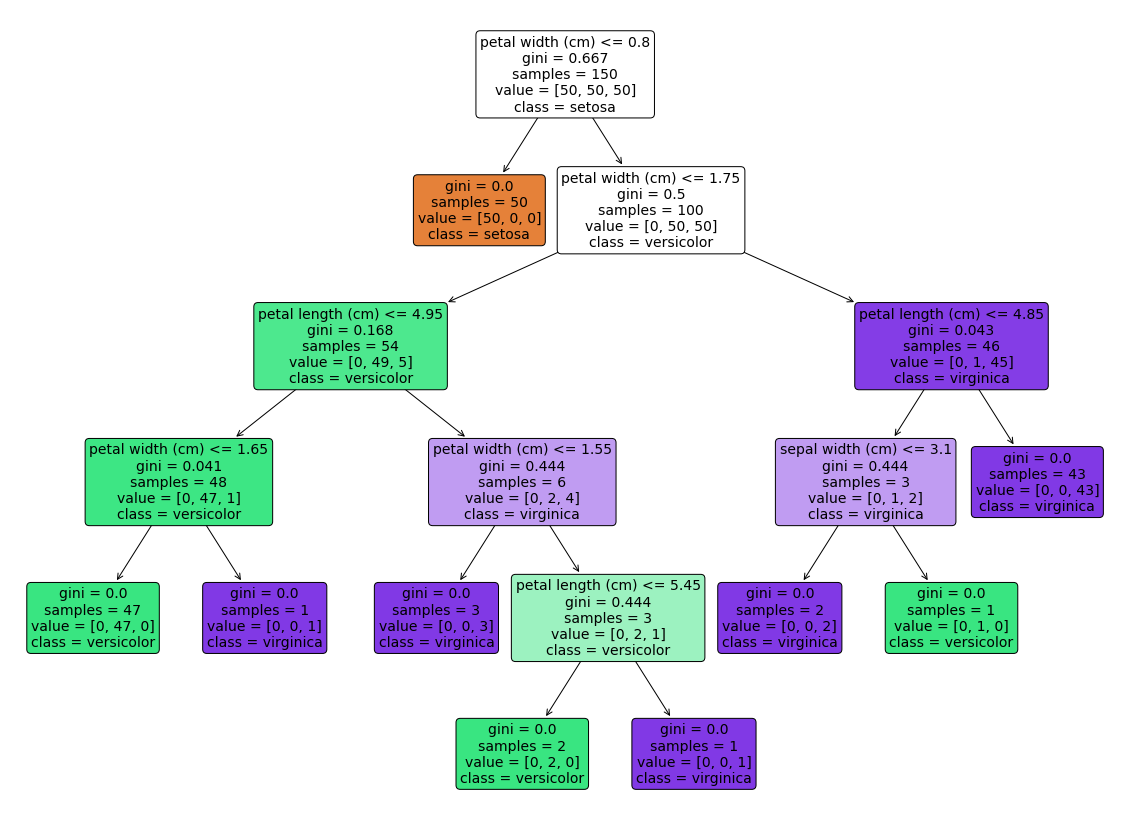

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
tree.plot_tree(model, filled=True,
feature_names=iris.feature_names,
class_names=iris.target_names,
rounded=True, fontsize=14)
plt.show()

In [49]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()
feature_name = ['pclass', 'age', 'sex']
dfX = df[feature_name].copy()
dfy = df['survived'].copy()

dfX.tail()


,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [51]:
from sklearn.preprocessing import LabelEncoder
dfX['sex'] = LabelEncoder().fit_transform(dfX['sex'])
dfX.tail()
dfX['age'].fillna(dfX['age'].mean(), inplace=True)
dfX.tail()


,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [52]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]), columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX['pclass'])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


,age,sex
0,22.000000,1
1,38.000000,0
2,26.000000,0
3,35.000000,0
4,35.000000,1
...,...,...
886,27.000000,1
887,19.000000,0
888,29.699118,0
889,26.000000,1


In [65]:
s_num = int(dfX.shape[0]*0.75)
train_x = dfX[['age','sex']][:s_num]
train_y = dfX[['c1','c2','c3']][:s_num]
test_x = dfX[['age','sex']][s_num:]
test_y = dfX[['c1','c2','c3']][s_num:]
decisiontree = DecisionTreeClassifier(random_state=0) # 결정 트리 분류기를 만듭니다.
model = decisiontree.fit(train_x , train_y) # 모델 훈련

In [69]:
model.predict(test_x)
test_y
import numpy as np

n

,c1,c2,c3
668,0,0,1
669,1,0,0
670,0,1,0
671,1,0,0
672,0,1,0
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [70]:
model.predict(test_x)

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [1,